In [38]:
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import json
import folium
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [4]:
public_health = pd.read_csv('../../Data/public health/public_health10_21.csv', index_col='시도별')
public_health.head()

,의원,병원,종합병원,상급종합병원,의사,치과의사,한의사,약사,간호사,기타보건의료인,시점
시도별,,,,,,,,,,,
서울특별시,7142,167,42,17,NaN,NaN,NaN,NaN,NaN,NaN,2009
부산광역시,2065,103,22,4,NaN,NaN,NaN,NaN,NaN,NaN,2009
대구광역시,1460,98,7,4,NaN,NaN,NaN,NaN,NaN,NaN,2009
인천광역시,1313,50,12,2,NaN,NaN,NaN,NaN,NaN,NaN,2009
광주광역시,826,49,17,2,NaN,NaN,NaN,NaN,NaN,NaN,2009


In [10]:
public_health['시점'].unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022])

In [9]:
public_health[public_health['시점'] == 2010]
#[['의원', '병원', '종합병원', '상급종합병원']]
#[['의사', '치과의사', '한의사', '약사', '간호사','기타보건의료인']]


,의원,병원,종합병원,상급종합병원,의사,치과의사,한의사,약사,간호사,기타보건의료인,시점
시도별,,,,,,,,,,,
서울특별시,7328,171,42,17,23077.0,5933.0,3937.0,7667.0,28634.0,4553.0,2010
부산광역시,2071,109,24,4,6247.0,1300.0,1134.0,2194.0,9268.0,1894.0,2010
대구광역시,1496,101,8,4,4597.0,1055.0,840.0,1679.0,6143.0,1280.0,2010
인천광역시,1321,55,12,2,3212.0,874.0,606.0,1356.0,4364.0,1375.0,2010
광주광역시,839,53,19,2,2723.0,783.0,393.0,951.0,4538.0,870.0,2010
대전광역시,957,35,6,2,2910.0,587.0,545.0,978.0,3874.0,1002.0,2010
울산광역시,532,37,4,0,1262.0,396.0,306.0,540.0,2192.0,499.0,2010
경기도,5598,253,49,5,14288.0,3930.0,2716.0,6101.0,18406.0,5302.0,2010
강원도,667,45,13,2,2254.0,557.0,425.0,820.0,3966.0,742.0,2010


In [25]:
public_health.iloc[:,0:10]

,의원,병원,종합병원,상급종합병원,의사,치과의사,한의사,약사,간호사,기타보건의료인
시도별,,,,,,,,,,
서울특별시,7142,167,42,17,NaN,NaN,NaN,NaN,NaN,NaN
부산광역시,2065,103,22,4,NaN,NaN,NaN,NaN,NaN,NaN
대구광역시,1460,98,7,4,NaN,NaN,NaN,NaN,NaN,NaN
인천광역시,1313,50,12,2,NaN,NaN,NaN,NaN,NaN,NaN
광주광역시,826,49,17,2,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
전라북도,1190,62,12,2,NaN,NaN,NaN,NaN,NaN,NaN
전라남도,958,73,25,1,NaN,NaN,NaN,NaN,NaN,NaN
경상북도,1296,56,20,0,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df = public_health[public_health['시점'] == 2020].iloc[:,0:10]

In [34]:
df

KeyError: 4

In [43]:
df[df.index=='경기도']

,의원,병원,종합병원,상급종합병원,의사,치과의사,한의사,약사,간호사,기타보건의료인,시점
시도별,,,,,,,,,,,
경기도,5598,253,49,5,14288.0,3930.0,2716.0,6101.0,18406.0,5302.0,2010


KeyError: "None of [Int64Index([230, 145, 109, 68, 85, 50, 38, 2, 288, 45, 38, 45, 73, 79, 73, 140,\n            7],\n           dtype='int64')] are in the [columns]"

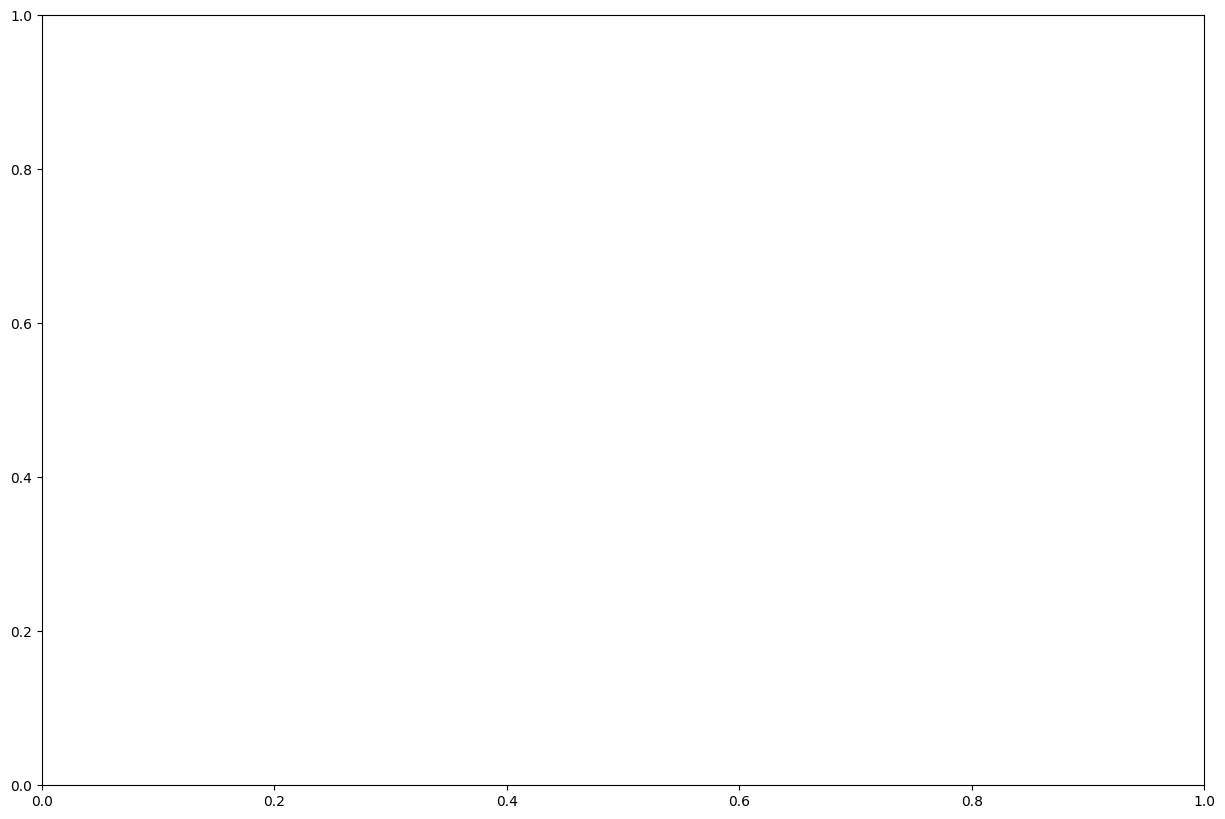

In [45]:
# plt.style.use('ggplot')
plt.style.use('default')

df = public_health[public_health['시점'] == 2020].iloc[:,0:10]
df.plot(
    kind='scatter',
    x = df['병원'],
    y = df['의사'],
    c = 'coral',
    figsize=(15,10)
)
plt.xlabel('4')
plt.show()

In [41]:
# df = public_health[public_health['시점'] == year][['의원', '병원', '종합병원', '상급종합병원']]
df = public_health[public_health['시점'] == 2010]
df[4]

KeyError: 4

In [14]:
plt.style.use('default')
years = [year for year in range(2020,2023)]
# years = [year for year in range(2009,2023)]
for year in years:
    df = public_health[public_health['시점'] == year][['의원', '병원', '종합병원', '상급종합병원']]
    df.plot(
    kind='scatter',
    x = df.index,
    y = df,
    # c = 'coral',
    # s = 10, #산점도 점의 크기 
    # s = cylinder_size, #산점도 점의 크기 300은 넘 크다 100으로 줄여야지
    figsize=(15,10)
)
    plt.show()
# plt.title('역상관을 잘 띄고 있따')
# plt.xlabel('4')

    

ValueError: scatter requires an x and y column